<a href="https://colab.research.google.com/github/Zivvvo/melanoma_classifier/blob/master/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from tensorflow import keras

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd /content/drive/My\ Drive/Colab\ Notebooks/SC_classifier

/content/drive/My Drive/Colab Notebooks/SC_classifier


In [5]:
sc_model = tf.keras.models.load_model("models/latest_model.h5")

In [7]:
IMAGE_FILE = "data/test/malignant/4.jpg"
im = keras.preprocessing.image.load_img(IMAGE_FILE, target_size=(256,256,3))
im = np.asarray(im)

In [8]:
sc_model.predict(im[np.newaxis, ...])

array([[0., 1.]], dtype=float32)

In [9]:
DataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0)
testSet = DataGenerator.flow_from_directory("test", batch_size =1, classes = ['benign', 'malignant'])

Found 660 images belonging to 2 classes.


Prediction:[[6.588962e-21 1.000000e+00]], actual result: [0. 1.]


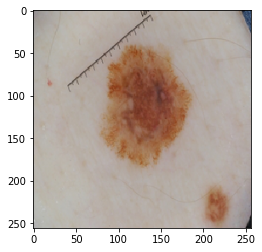

In [10]:
#predictions on validation set examples
batch_num = 256
index_num = 0

x = testSet[batch_num][0][index_num]

prediction = sc_model.predict(x[np.newaxis, ...])
print("Prediction:"+ str(prediction) + ", actual result: "+ str(testSet[batch_num][1][index_num]))
plt.imshow(x)

In [11]:
sc_model.evaluate(testSet)

660/660 [==============================] - 532s 806ms/step - loss: 0.5051 - accuracy: 0.8348


[0.5050758719444275, 0.8348484635353088]

Prediction: malignant
(256, 256, 3)


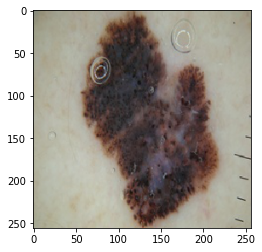

In [12]:
IMAGE_FILE = "data/test/malignant/3.jpg"
im = keras.preprocessing.image.load_img(IMAGE_FILE, target_size=(256,256,3))
im = np.asarray(im)/255.0

pred = sc_model.predict(im[np.newaxis,...])
if (np.round(pred)[0][0]==1):
  pred = "benign"
else:
  pred = "malignant"
print("Prediction: "+ str(pred))
plt.imshow(im)

In [16]:
def predict(IMG_PATH, MODEL_PATH):
  sc_model = tf.keras.models.load_model(MODEL_PATH)

  IMAGE_FILE = IMG_PATH
  im = keras.preprocessing.image.load_img(IMAGE_FILE, target_size=(256,256,3))
  im = np.asarray(im)/255.0
  print(IMG_PATH)
  plt.imshow(im)

  pred = sc_model.predict(im[np.newaxis,...])
  print("Prediction score (between 0 and 1):" + str(np.max(pred)))
  if (np.round(pred)[0][0]==1):
    pred = "benign"
  else:
    pred = "malignant"
  print("Prediction: "+ str(pred))

  return pred

data/test/malignant/3.jpg
Prediction score (between 0 and 1):0.99957913
Prediction: malignant


'malignant'

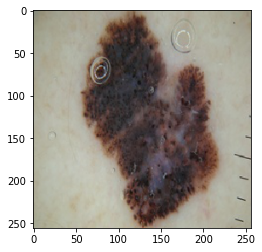

In [17]:
predict("data/test/malignant/3.jpg", "models/latest_model.h5")